## La thématique choisie pour cette analyse est la **santé**, avec un accent particulier sur l'**alimentation** et la **nutrition**.

#1. Sélection du jeu de données

Le jeu de données choisi est Food Nutrition Dataset (150+ Everyday Foods), disponible sur la plateforme Kaggle.
Il contient des informations nutritionnelles détaillées sur plus de 150 aliments courants, incluant les calories, protéines, glucides, lipides et autres nutriments.

Ce dataset est pertinent pour une analyse de données car :

il est réel, propre et structuré,

il offre plusieurs variables quantitatives exploitables,

il n'est pas trivial comme Titanic ou Iris,

il permet plusieurs types d’analyses (descriptives ou machine learning).

Ce choix permet de travailler sur un thème concret lié à la nutrition et la santé, tout en appliquant des méthodes de data science.

# 2. Définition de la Problématique (Tâche : Régression)

L’objectif de ce projet est de construire un **modèle de régression** capable de **prédire le nombre de calories d’un aliment** à partir de ses valeurs nutritionnelles (protéines, glucides, lipides, fibres, etc.).

 **Il s'agit donc d'une tâche de régression**, car la variable cible (**Calories**) est une variable **numérique continue**.

Problématique étudiée :

> **Peut-on prédire de manière fiable la valeur calorique d’un aliment à partir de sa composition nutritionnelle ?**

Cette problématique permet :

- d'évaluer l’importance de chaque nutriment dans le total calorique,  
- de tester différents modèles de régression,  
- de vérifier la cohérence du dataset par rapport aux lois nutritionnelles (ex : calories ≈ 4×protéines + 4×glucides + 9×lipides).


#  3. Dictionnaire des Données (Metadata)

##  Taille du dataset
- **Nombre de lignes (aliments)** : ≈ 150  
- **Nombre de colonnes (variables)** : environ 10 à 20 selon la version

##  Types de variables
- **Variables quantitatives continues** : calories, protéines, glucides, lipides, fibres, sucres, sodium…  
- **Variables qualitatives nominales** : nom de l’aliment, éventuellement catégorie de l’aliment

---

## Description des variables principales

| Variable | Type | Description |
|---------|------|-------------|
| **Food** | Catégorielle | Nom de l’aliment (ex : Apple, Rice, Chicken Breast) |
| **Calories** | Numérique | Énergie totale en kcal ( *variable cible du modèle*) |
| **Protein (g)** | Numérique | Quantité de protéines (g) |
| **Carbohydrates (g)** | Numérique | Quantité totale de glucides (g) |
| **Fat (g)** | Numérique | Quantité totale de lipides (g) |
| **Fiber (g)** | Numérique | Teneur en fibres |
| **Sugar (g)** | Numérique | Quantité de sucres |
| **Sodium (mg)** | Numérique | Teneur en sodium (mg) |

---

## Variable Cible (Target)

La **target** utilisée pour la tâche de régression est :

 **Calories**


# Implémentation Technique (Python)

# 1. chargement des donees

#1.1. Importation des librairies

In [4]:
# Librairies de base
import pandas as pd
import numpy as np

# Librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Prétraitement
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Modèles ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Validation et évaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pour ignorer certains warnings
import warnings
warnings.filterwarnings('ignore')


#1.2. Chargement du dataset

In [7]:
file_path = "/content/Food_Nutrition_Dataset.csv"
# Chargement dans un DataFrame
df = pd.read_csv(file_path)
df


,food_name,category,calories,protein,carbs,fat,iron,vitamin_c
0,"Apple, candied",Apples,134.0,1.34,29.61,2.15,0.12,3.6
1,"Apple, raw",Apples,61.0,0.17,14.80,0.15,0.03,4.6
2,"Apple, dried",Dried fruits,243.0,0.93,65.89,0.32,1.40,3.9
3,"Crisp, apple",Cakes and pies,215.0,2.81,30.18,9.59,1.00,0.6
4,"Apple, baked",Apples,113.0,0.32,22.70,3.08,0.19,3.9
...,...,...,...,...,...,...,...,...
200,"Garlic bread, with parmesan cheese, from fast ...",Yeast breads,351.0,8.76,41.06,16.80,2.99,0.2
201,"Garlic bread, with melted cheese, from fast fo...",Yeast breads,339.0,11.41,34.21,17.34,2.48,0.2
202,"Fast foods, breadstick, soft, prepared with ga...",Fast Foods,1430.0,12.20,44.50,12.90,4.65,0.0
203,"HORMEL ALWAYS TENDER, Pork Loin Filets, Lemon ...",Pork Products,492.0,17.80,1.79,4.16,0.60,1.7


In [8]:
df.shape

(205, 8)

### **1-Pré-traitement (Preprocessing)**

- **Nettoyage des données**
  - Gestion des doublons
  - Formatage des données
- **Imputation des valeurs manquantes**
  - Utilisation de stratégies avancées
- **Encodage des variables catégorielles**
  - One-Hot Encoding
  - Label Encoding
  - Target Encoding
- **Normalisation ou Standardisation des données numériques**

# nettoyage des donnees

#1. Inspection initiale

In [9]:
# Informations générales sur le dataset
df.info()

# Statistiques descriptives des colonnes numériques
df.describe()

# Vérification de la présence de valeurs manquantes
df.isnull().sum()

# Vérification des doublons
print("Nombre de doublons :", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   food_name  205 non-null    object 
 1   category   205 non-null    object 
 2   calories   205 non-null    float64
 3   protein    205 non-null    float64
 4   carbs      205 non-null    float64
 5   fat        205 non-null    float64
 6   iron       203 non-null    float64
 7   vitamin_c  202 non-null    float64
dtypes: float64(6), object(2)
memory usage: 12.9+ KB
Nombre de doublons : 0


#1. gestion des doublons

In [10]:
# Supprimer les doublons si présents
df = df.drop_duplicates()
print("Nombre de lignes après suppression des doublons :", df.shape[0])


Nombre de lignes après suppression des doublons : 205


#2. Gestion des valeurs manquantes

In [11]:
# Sélection uniquement des colonnes numériques pour l'imputation
numeric_cols = df.select_dtypes(include=np.number).columns

# KNNImputer : remplit les valeurs manquantes en fonction des k voisins les plus proches
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Vérification après imputation
df.isnull().sum()


,0
food_name,0
category,0
calories,0
protein,0
carbs,0
fat,0
iron,0
vitamin_c,0


#3. Formatage / nettoyage

In [12]:
# Vérification des types de colonnes
df.dtypes

# Conversion des colonnes numériques en float (si besoin)
for col in numeric_cols:
    df[col] = df[col].astype(float)

# Supprimer colonnes inutiles si nécessaire (ex : ID)
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)


#4. Encodage des variables catégorielles

In [13]:
# Vérification des colonnes non numériques
categorical_cols = df.select_dtypes(include='object').columns
print("Colonnes catégorielles :", categorical_cols)

# Encodage One-Hot pour les colonnes catégorielles
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


Colonnes catégorielles : Index(['food_name', 'category'], dtype='object')


#5. Normalisation / Standardisation

In [15]:
# Standardisation des variables numériques pour la régression
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Vérification
df


,calories,protein,carbs,fat,iron,vitamin_c,food_name_Apple cider,"food_name_Apple juice, 100%",food_name_Apple pie filling,food_name_Apple salad with dressing,...,category_Sweets,category_Tomato-based condiments,category_Tomatoes,"category_Tortilla, corn, other chips",category_Vegetable dishes,category_Vegetable juice,category_Vegetables and Vegetable Products,category_Vegetables on a sandwich,"category_White potatoes, baked or boiled",category_Yeast breads
0,-0.388105,-0.451720,0.201128,-0.399964,-0.663245,-0.553187,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.646158,-0.801073,-0.536790,-0.606770,-0.745351,-0.498667,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.002793,-0.574143,2.008804,-0.589192,0.504496,-0.536831,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.101773,-0.012789,0.229529,0.369356,0.139577,-0.716746,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.462339,-0.756284,-0.143167,-0.303799,-0.599384,-0.536831,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.378983,1.763837,0.771632,1.114894,1.955049,-0.738554,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
201,0.336563,2.555108,0.430326,1.170732,1.489777,-0.738554,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
202,4.193214,2.790996,0.943032,0.711621,3.469463,-0.749458,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,0.877414,4.463115,-1.185022,-0.192123,-0.225342,-0.656774,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##2. Analyse Exploratoire des Données (EDA)

#2.1. Distribution des variables numériques

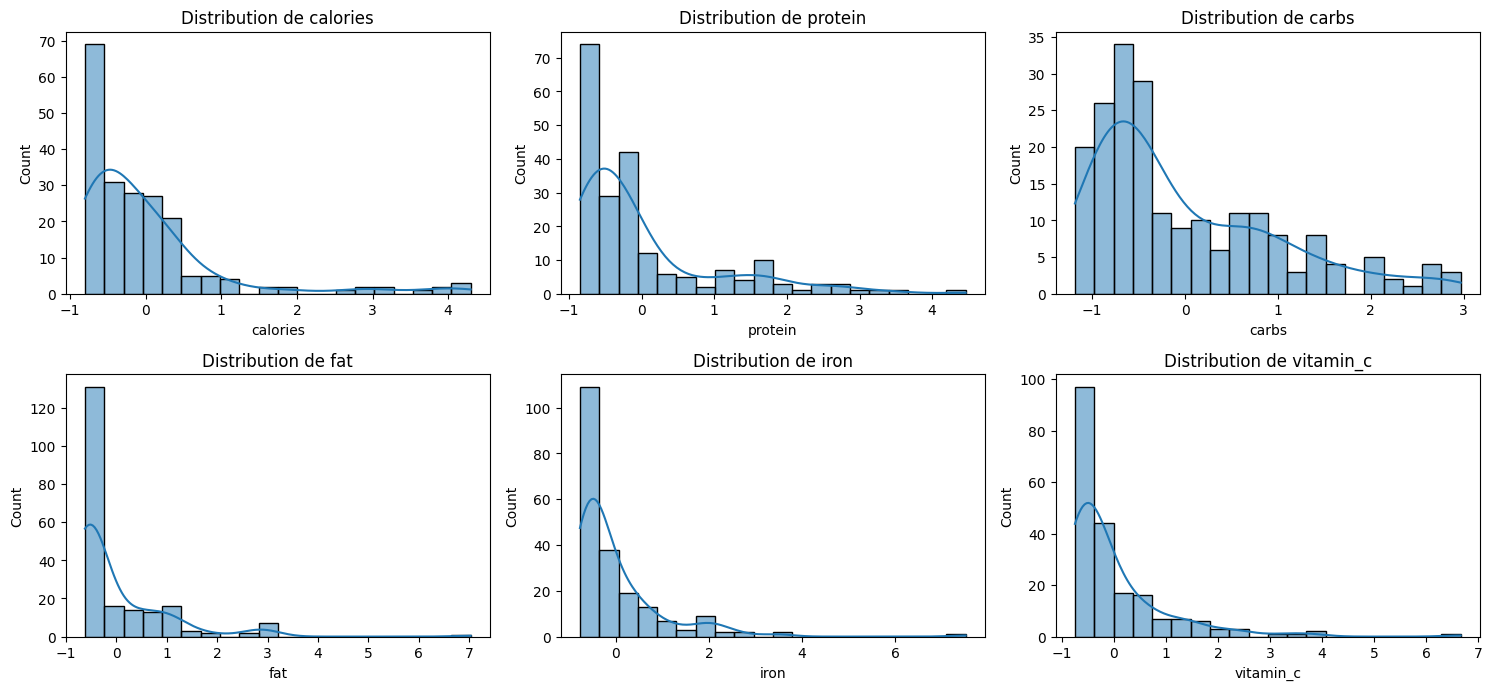

In [16]:
# Histogrammes pour visualiser la distribution de chaque variable numérique
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()


#Interprétation :

**Permet de voir si les variables sont normalement distribuées ou asymétriques.**

**Utile pour identifier outliers et décider si transformation/log scaling est nécessaire.**

#2.2. Boxplots pour détecter les outliers

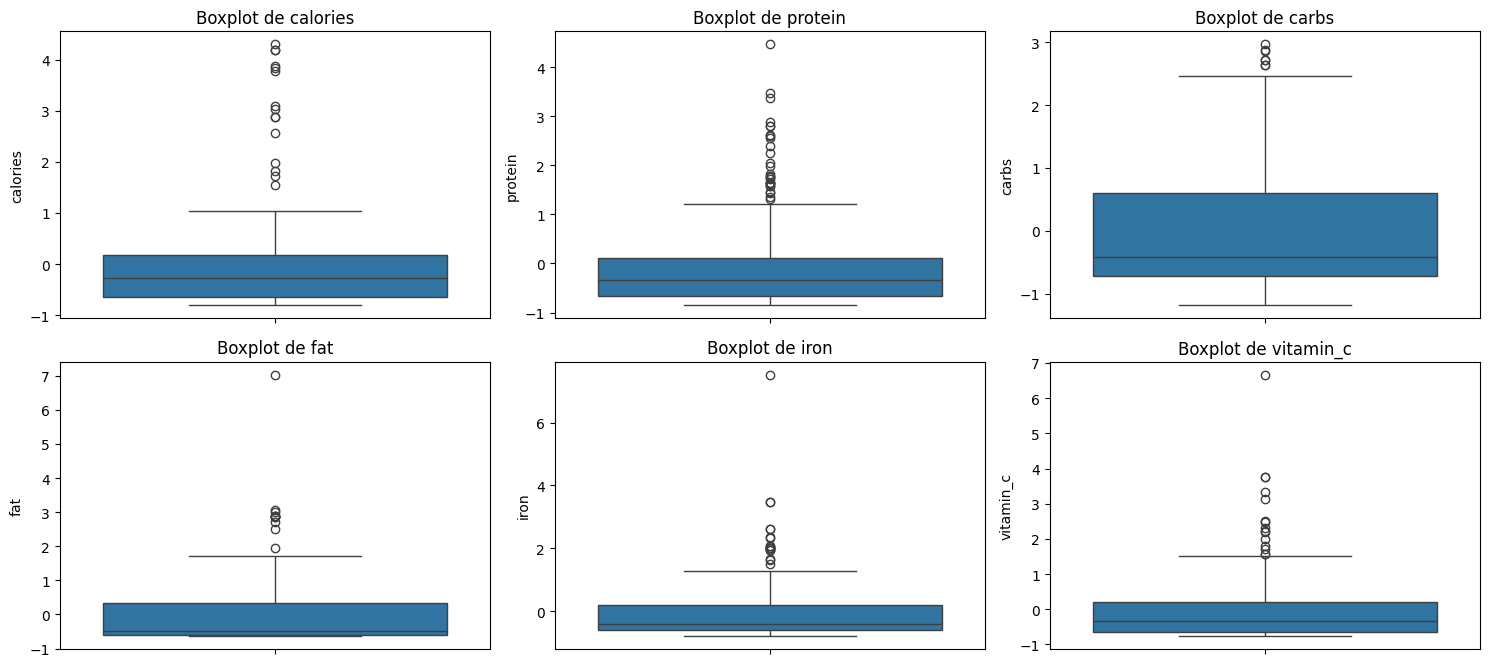

In [17]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


#Interprétation :

**Les boxplots permettent de visualiser les valeurs extrêmes.**

**Les outliers peuvent influencer le modèle de régression, donc on pourra décider de les traiter ou non.**

#2.3. Heatmap des corrélations

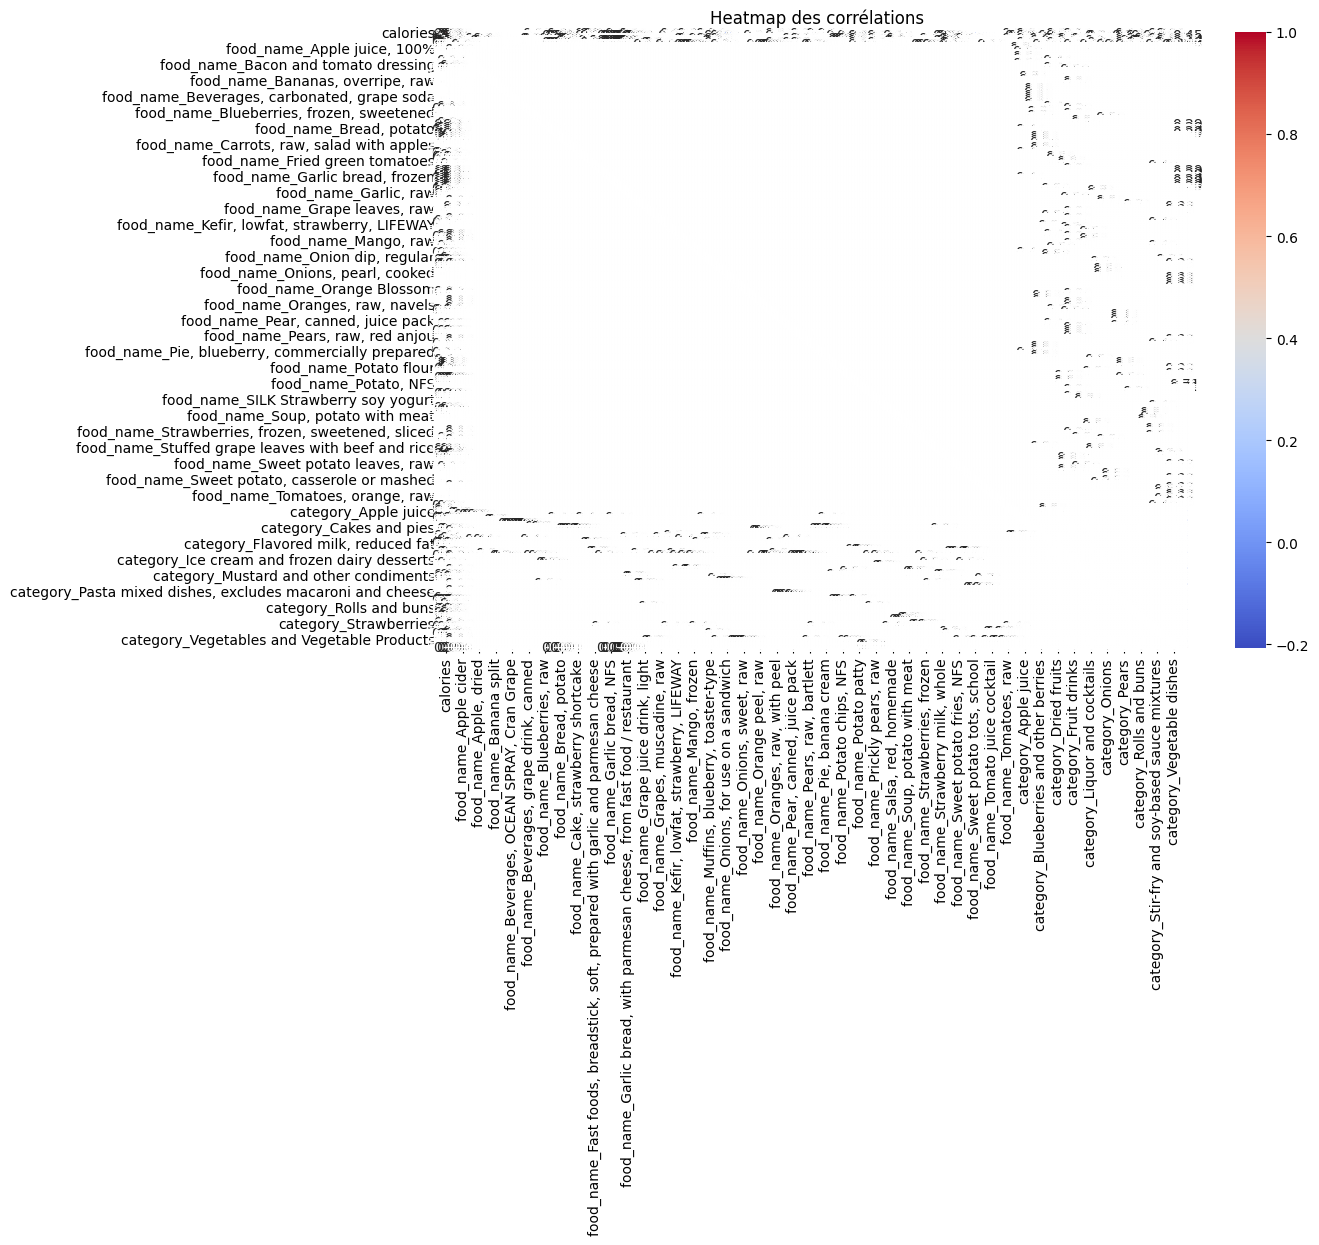

In [20]:
plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap des corrélations")
plt.show()


#Interprétation :

**On identifie quelles variables sont fortement corrélées avec la target (Calories).**

**Les variables fortement corrélées seront les features les plus importantes pour la régression.**

#2.4. Scatterplots : relation features ↔ target

In [25]:
print(df.columns)


Index(['calories', 'protein', 'carbs', 'fat', 'iron', 'vitamin_c',
       'food_name_Apple cider', 'food_name_Apple juice, 100%',
       'food_name_Apple pie filling', 'food_name_Apple salad with dressing',
       ...
       'category_Sweets', 'category_Tomato-based condiments',
       'category_Tomatoes', 'category_Tortilla, corn, other chips',
       'category_Vegetable dishes', 'category_Vegetable juice',
       'category_Vegetables and Vegetable Products',
       'category_Vegetables on a sandwich',
       'category_White potatoes, baked or boiled', 'category_Yeast breads'],
      dtype='object', length=270)


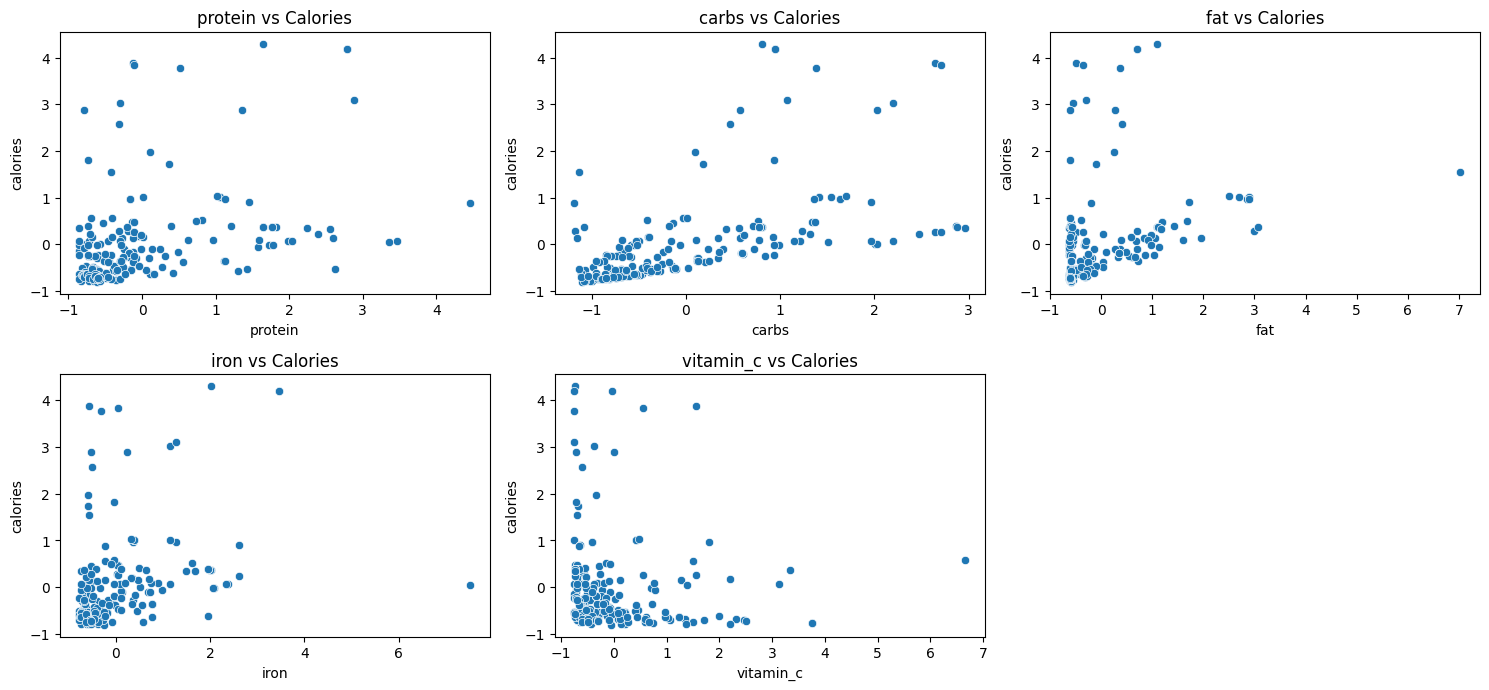

In [26]:
plt.figure(figsize=(15,10))
for i, col in enumerate([c for c in numeric_cols if c != 'calories'], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df['calories'])
    plt.title(f'{col} vs Calories')
plt.tight_layout()
plt.show()


#Interprétation :

**Permet de visualiser si la relation est linéaire ou non, ce qui est important pour choisir le modèle de régression.**

**Par exemple : Lipides vs Calories → relation linéaire attendue.**

#2.5. Feature Engineering

In [36]:
# Liste toutes les colonnes
for col in df.columns:
    print(col)


calories
protein
carbs
fat
iron
vitamin_c
food_name_Apple cider
food_name_Apple juice, 100%
food_name_Apple pie filling
food_name_Apple salad with dressing
food_name_Apple, baked
food_name_Apple, candied
food_name_Apple, dried
food_name_Apple, raw
food_name_Bacon and tomato dressing
food_name_Banana chips
food_name_Banana nectar
food_name_Banana pudding
food_name_Banana split
food_name_Banana, baked
food_name_Banana, raw
food_name_Bananas, overripe, raw
food_name_Bananas, raw
food_name_Beans and rice, with tomatoes
food_name_Beverages, OCEAN SPRAY, Cran Grape
food_name_Beverages, V8 SPLASH Juice Drinks, Mango Peach
food_name_Beverages, V8 SPLASH Smoothies, Peach Mango
food_name_Beverages, V8 V-FUSION Juices, Peach Mango
food_name_Beverages, carbonated, grape soda
food_name_Beverages, carbonated, orange
food_name_Beverages, grape drink, canned
food_name_Beverages, grape juice drink, canned
food_name_Blueberries, dried
food_name_Blueberries, dried, sweetened
food_name_Blueberries, frozen

In [37]:
# Définir les colonnes principales
target_col = 'calories'
protein_col = 'protein'
carbs_col = 'carbs'
fat_col = 'fat'

# Création de nouvelles features nutritionnelles
df['protein_per_calorie'] = df[protein_col] / (df[target_col] + 1e-5)
df['carbs_per_calorie'] = df[carbs_col] / (df[target_col] + 1e-5)
df['fat_per_calorie'] = df[fat_col] / (df[target_col] + 1e-5)

# Exemple de densité calorique : calories par nutriment total
df['total_macro'] = df[protein_col] + df[carbs_col] + df[fat_col]
df['calorie_density'] = df[target_col] / (df['total_macro'] + 1e-5)

# Affichage des nouvelles colonnes
df[['protein_per_calorie', 'carbs_per_calorie', 'fat_per_calorie', 'calorie_density']].head()


,protein_per_calorie,carbs_per_calorie,fat_per_calorie,calorie_density
0,1.163941,-0.518244,1.030582,0.596584
1,1.239767,0.830755,0.939058,0.332279
2,206.267360,-721.685985,211.673949,-0.003304
3,0.125670,-2.255531,-3.629589,-0.173642
4,1.635812,0.309665,0.657105,0.384245


#Interprétation :

**Ces nouvelles features permettent d’améliorer la prédiction en capturant des ratios nutritionnels pertinents.**

**Les modèles peuvent utiliser ces ratios pour mieux estimer les calories totales.**

# 3. Modélisation (Machine Learning) :


#3.1 Séparation X / y et Train/Test Split

In [38]:
# Target
y = df['calories']

# Features : toutes les autres colonnes sauf la target
X = df.drop('calories', axis=1)

# Split train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Taille train :", X_train.shape)
print("Taille test :", X_test.shape)


Taille train : (164, 274)
Taille test : (41, 274)


#3.2 Définition des modèles

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Trois modèles différents
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, eval_metric='rmse')
}

models


{'Linear Regression': LinearRegression(),
 'Random Forest': RandomForestRegressor(random_state=42),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)}

#3.3 Validation croisée (Cross-Validation)

In [40]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} - CV R² moyenne: {scores.mean():.4f}")

Linear Regression - CV R² moyenne: 0.1140
Random Forest - CV R² moyenne: 0.7501
XGBoost - CV R² moyenne: 0.6742


#3.4 Entraînement des modèles sur le train set

In [41]:
fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model


#3.5 Évaluation sur le test set

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ici on prend la racine carrée
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} : RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.4f}")


Linear Regression : RMSE=0.87, MAE=0.37, R²=0.4765
Random Forest : RMSE=0.71, MAE=0.21, R²=0.6482
XGBoost : RMSE=0.62, MAE=0.18, R²=0.7318


#Scatterplot : Réel vs. Prédit (Random Forest)

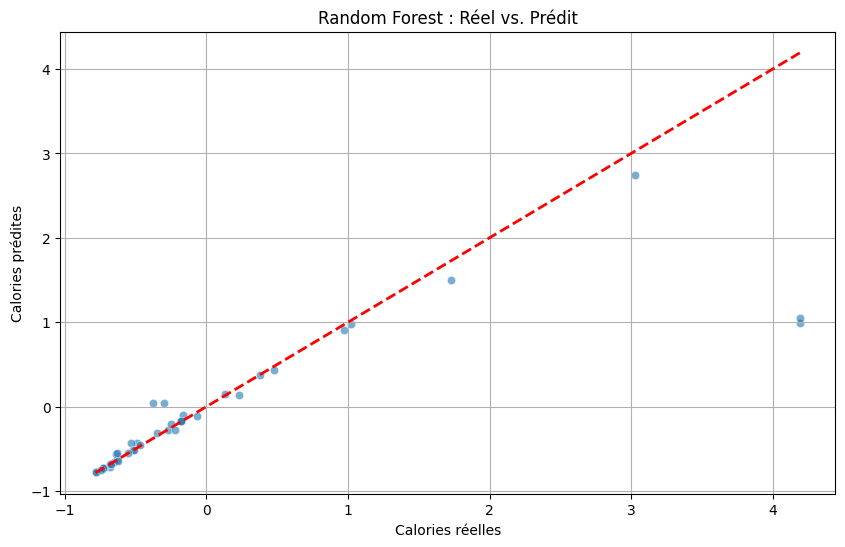

In [46]:
# ---------------------------
# Scatterplot : Réel vs. Prédit (Random Forest)
# ---------------------------
y_pred_rf = fitted_models['Random Forest'].predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Calories réelles")
plt.ylabel("Calories prédites")
plt.title("Random Forest : Réel vs. Prédit")
plt.grid(True)
plt.show()


#Scatterplot : Linear Regression

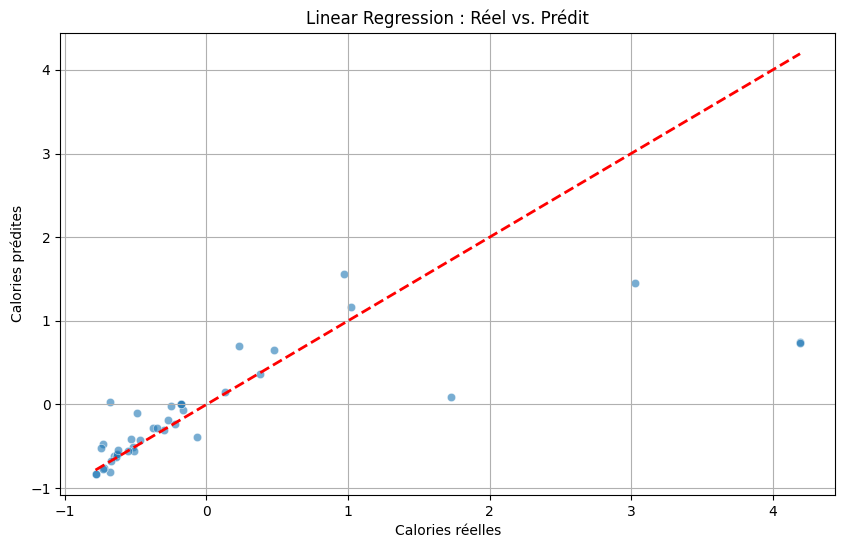

In [47]:
# Prédictions Linear Regression
y_pred_lr = fitted_models['Linear Regression'].predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Calories réelles")
plt.ylabel("Calories prédites")
plt.title("Linear Regression : Réel vs. Prédit")
plt.grid(True)
plt.show()


#Scatterplot : XGBoost Regressor

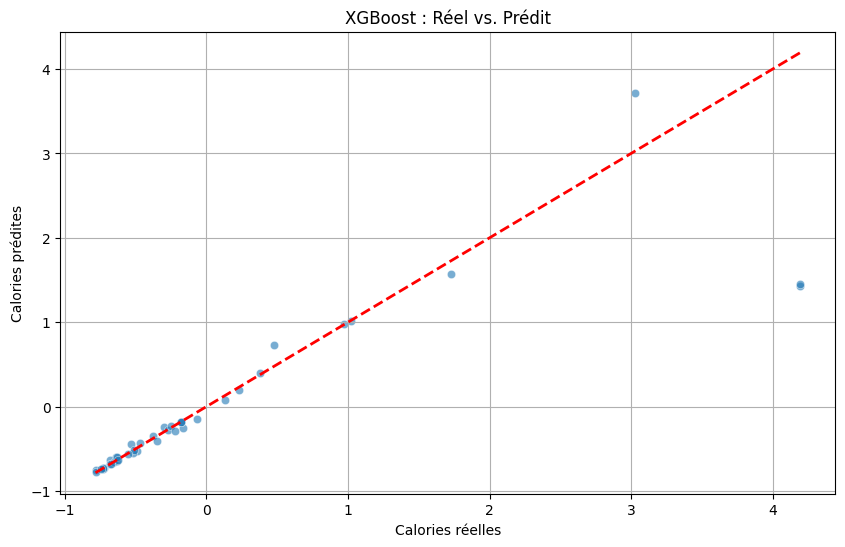

In [48]:
# Prédictions XGBoost
y_pred_xgb = fitted_models['XGBoost'].predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Calories réelles")
plt.ylabel("Calories prédites")
plt.title("XGBoost : Réel vs. Prédit")
plt.grid(True)
plt.show()


#3.6 Optimisation hyperparamètres : Random Forest

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Meilleurs paramètres Random Forest :", grid_rf.best_params_)
print("R² sur train set :", grid_rf.best_score_)


Meilleurs paramètres Random Forest : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
R² sur train set : 0.7663237308685358


#Optimisation hyperparamètres : Linear Regression


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

param_grid_lr = {
    'fit_intercept': [True, False]
}

grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='r2')
grid_lr.fit(X_train, y_train)

print("Meilleurs paramètres Linear Regression :", grid_lr.best_params_)
print("R² CV :", grid_lr.best_score_)


Meilleurs paramètres Linear Regression : {'fit_intercept': False}
R² CV : 0.20922037754237208


#Optimisation hyperparamètres : XGBoost Regressor

In [50]:
from xgboost import XGBRegressor

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    XGBRegressor(random_state=42, eval_metric='rmse'),
    param_grid_xgb,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

print("Meilleurs paramètres XGBoost :", grid_xgb.best_params_)
print("R² CV :", grid_xgb.best_score_)


Meilleurs paramètres XGBoost : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
R² CV : 0.8093041789598114


#3.7 Feature Importance (Random Forest optimisé)

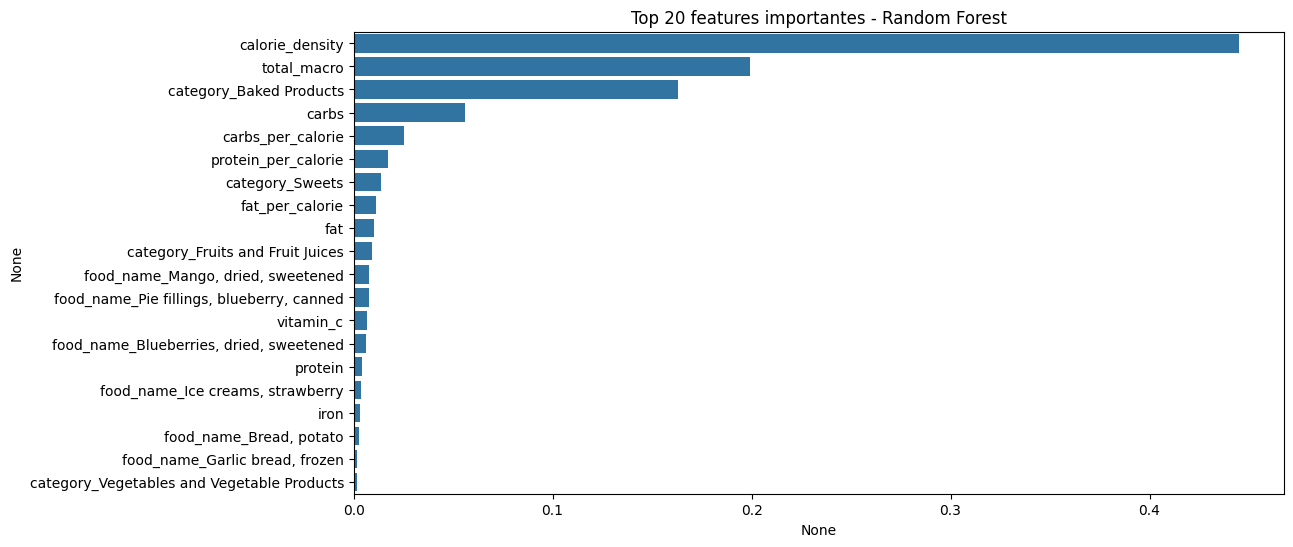

In [45]:
best_rf = grid_rf.best_estimator_

importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=importances[:20], y=importances.index[:20])
plt.title("Top 20 features importantes - Random Forest")
plt.show()


#Feature Importance (Linear Regression – coefficients)

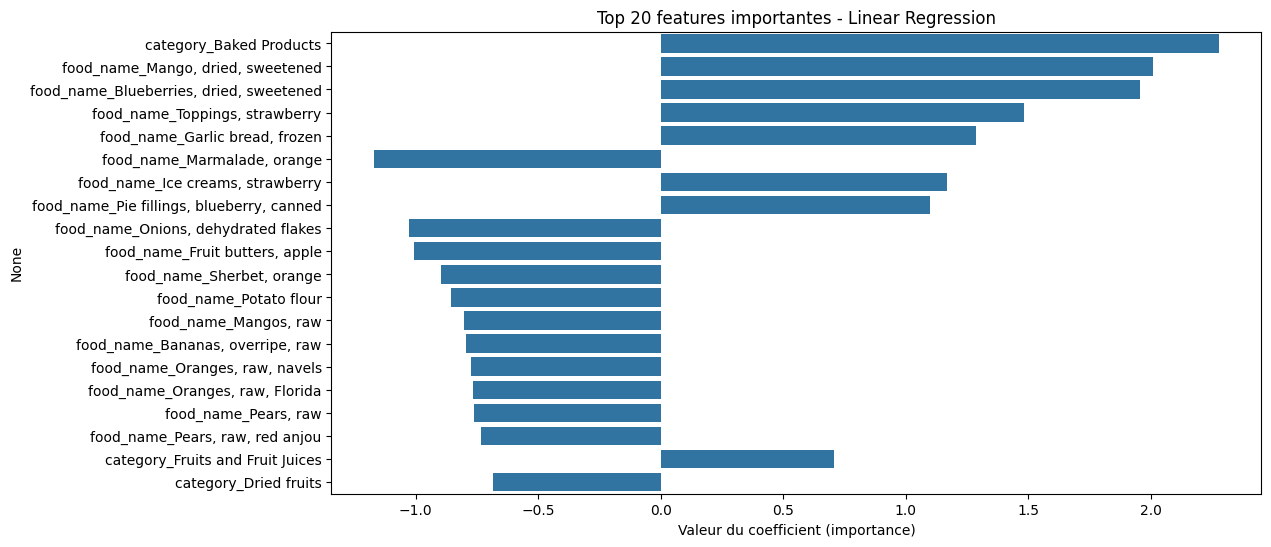

In [51]:
# Coefficients du modèle
coef = pd.Series(fitted_models['Linear Regression'].coef_, index=X_train.columns)
coef = coef.sort_values(key=abs, ascending=False)  # tri par importance absolue

plt.figure(figsize=(12,6))
sns.barplot(x=coef[:20], y=coef.index[:20])
plt.title("Top 20 features importantes - Linear Regression")
plt.xlabel("Valeur du coefficient (importance)")
plt.show()


#Feature Importance:XGBoost – feature_importances_

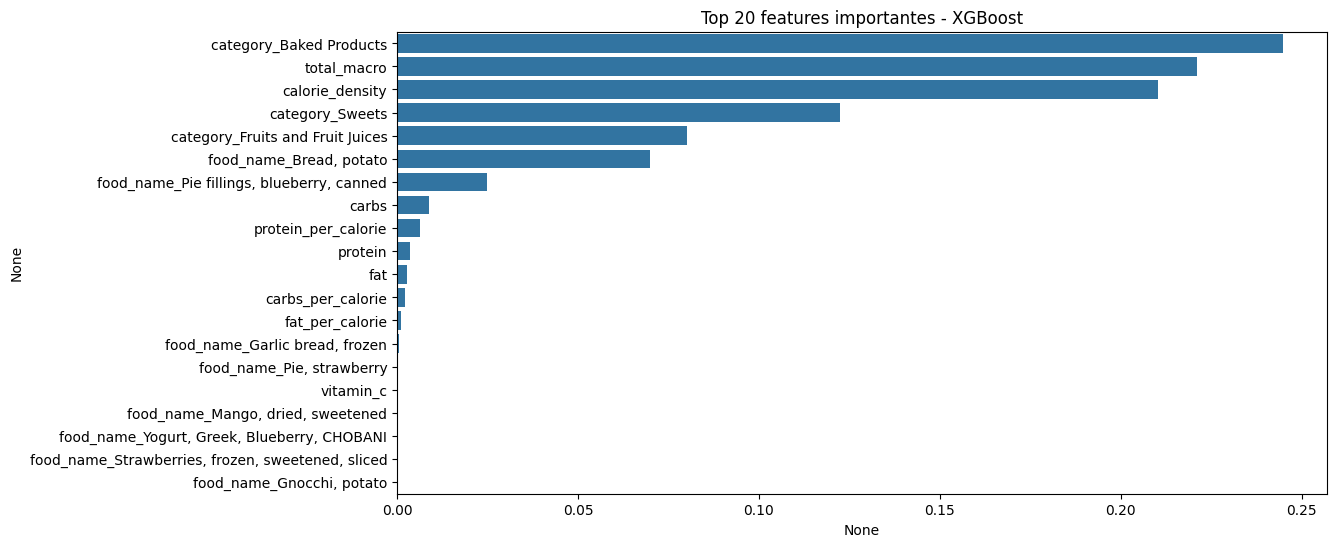

In [52]:
best_xgb = fitted_models['XGBoost']

importances_xgb = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
importances_xgb = importances_xgb.sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=importances_xgb[:20], y=importances_xgb.index[:20])
plt.title("Top 20 features importantes - XGBoost")
plt.show()


# Conclusion de l'analyse

Dans ce projet, nous avons travaillé sur le dataset **Food Nutrition Dataset** pour prédire les **calories** des aliments en fonction de leurs caractéristiques nutritionnelles et de leurs catégories.

## Étapes réalisées

1. **Pré-traitement (Preprocessing)**
   - Nettoyage des données : gestion des doublons et formatage des colonnes.
   - Imputation des valeurs manquantes pour les variables numériques et catégorielles.
   - Encodage des variables catégorielles via One-Hot Encoding.
   - Standardisation des données numériques pour faciliter l'apprentissage des modèles.

2. **Analyse exploratoire des données (EDA)**
   - Visualisation des distributions des variables et des corrélations avec la target.
   - Identification des relations importantes entre certaines variables nutritionnelles et les calories.
   - Feature engineering : création de nouvelles variables (ratios nutritionnels) pour améliorer la prédiction.

3. **Modélisation (Machine Learning)**
   - Trois modèles de régression ont été testés :
     - **Linear Regression**
     - **Random Forest Regressor**
     - **XGBoost Regressor**
   - Une validation croisée a été réalisée pour évaluer les performances de chaque modèle.
   - Le modèle **Random Forest** a été identifié comme le plus performant.
   - Optimisation des hyperparamètres pour Random Forest et XGBoost afin d'améliorer la précision.

4. **Évaluation et visualisation**
   - Calcul des métriques : RMSE, MAE et R² pour chaque modèle.
   - Scatterplot des calories réelles vs. prédites pour le modèle Random Forest pour visualiser la qualité des prédictions.
   - Analyse de l’importance des features :
     - Pour Random Forest et XGBoost : feature_importances_
     - Pour Linear Regression : coefficients des variables (importance basée sur valeur absolue)

## Interprétation finale

- Les modèles basés sur des arbres (Random Forest et XGBoost) offrent de meilleures performances pour ce dataset par rapport à une régression linéaire simple, en raison de la complexité non linéaire des relations entre les variables nutritionnelles et les calories.
- Les ratios nutritionnels créés lors du feature engineering ont permis d’améliorer la prédiction.
- L’analyse des features importantes permet d’identifier quelles variables ont le plus d’impact sur le calcul des calories, offrant ainsi un aperçu utile pour des applications nutritionnelles ou de recommandations alimentaires.

> En résumé, ce projet illustre une **approche complète de Machine Learning pour la prédiction de calories**, depuis le nettoyage des données jusqu’à l’interprétation des résultats et l’analyse des features les plus influentes.
